# Car-Insurance Claim Prediction

In [132]:
# Import module and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [133]:
# import dataset
data=pd.read_csv(r"C:\Users\Siddhesh\Documents\Project_data\Car_Insurence.csv")
data

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,Manual,5,Power,4.6,3445,1515,1475,1185,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,Manual,5,Power,4.6,3445,1515,1475,1185,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,Manual,5,Power,4.6,3445,1515,1475,1185,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Automatic,5,Electric,4.8,3995,1735,1515,1335,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,Automatic,5,Electric,5.0,3731,1579,1490,1155,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,Automatic,5,Electric,5.0,3731,1579,1490,1155,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,Manual,5,Power,4.6,3445,1515,1475,1185,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,Manual,5,Power,4.6,3445,1515,1475,1185,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Manual,5,Electric,4.8,3845,1735,1530,1335,2,0


In [134]:
data.shape

(58592, 32)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   policy_id               58592 non-null  object 
 1   policy_tenure           58592 non-null  float64
 2   age_of_car              58592 non-null  float64
 3   age_of_policyholder     58592 non-null  float64
 4   area_cluster            58592 non-null  object 
 5   population_density      58592 non-null  int64  
 6   make                    58592 non-null  int64  
 7   segment                 58592 non-null  object 
 8   model                   58592 non-null  object 
 9   fuel_type               58592 non-null  object 
 10  max_torque              58592 non-null  object 
 11  max_power               58592 non-null  object 
 12  engine_type             58592 non-null  object 
 13  airbags                 58592 non-null  int64  
 14  is_esc                  58592 non-null

In [136]:
L_id=data["policy_id"]

In [137]:
data=data.drop(["policy_id"],axis=1)

In [138]:
# To convert categorical type data into numeric type.
# Use Label Encoder

for col in data:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])

In [139]:
data.drop_duplicates(inplace=True)

In [140]:
data.is_claim.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

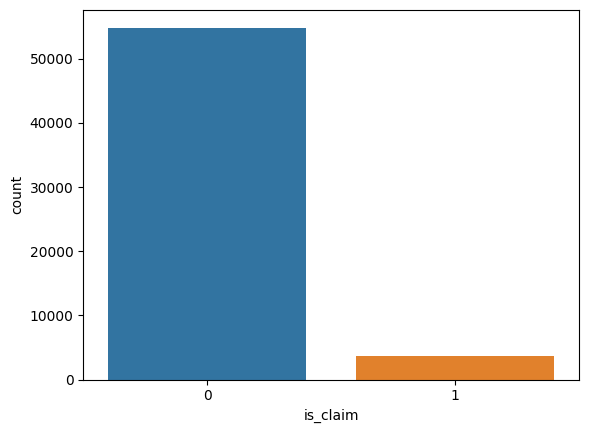

In [141]:
sns.countplot(data=data,x='is_claim')
plt.show()

In [143]:
data1=data.corr()
data1

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.170853,0.139954,0.035183,-0.045937,0.087039,0.173575,0.201708,0.184388,-0.121835,...,-0.108270,0.095453,-0.116540,0.159690,0.188654,0.194051,0.188523,0.119287,0.146422,0.077128
age_of_car,0.170853,1.000000,-0.036116,0.049618,-0.015344,0.189686,0.362658,0.368229,0.344937,-0.220991,...,-0.224028,0.202976,-0.214976,0.322551,0.379066,0.387520,0.377996,0.264455,0.305650,-0.028204
age_of_policyholder,0.139954,-0.036116,1.000000,0.008967,0.020655,-0.031989,-0.022912,-0.049087,0.010322,-0.035233,...,0.025091,-0.003115,0.000480,-0.019754,-0.018045,-0.005890,-0.037836,-0.012135,-0.029865,0.022435
area_cluster,0.035183,0.049618,0.008967,1.000000,-0.103179,0.028358,0.066277,0.057495,0.050661,-0.034177,...,-0.036298,0.048550,-0.019005,0.057465,0.064962,0.070697,0.075505,0.056130,0.050150,0.009425
population_density,-0.045937,-0.015344,0.020655,-0.103179,1.000000,-0.002011,-0.027347,-0.012793,-0.013021,0.018473,...,0.017229,-0.026737,-0.005556,-0.019263,-0.024478,-0.029085,-0.025450,-0.028506,-0.005422,-0.011195
make,0.087039,0.189686,-0.031989,0.028358,-0.002011,1.000000,0.609678,0.266116,0.059457,0.100612,...,-0.466939,0.632807,0.094661,0.789363,0.724491,0.598971,0.328060,0.499869,0.880485,-0.000456
segment,0.173575,0.362658,-0.022912,0.066277,-0.027347,0.609678,1.000000,0.440043,0.354273,-0.261402,...,-0.585981,0.741399,-0.039388,0.755615,0.901378,0.824862,0.794163,0.815239,0.651940,0.006366
model,0.201708,0.368229,-0.049087,0.057495,-0.012793,0.266116,0.440043,1.000000,0.598950,-0.515991,...,-0.125954,0.047277,-0.546235,0.371457,0.512848,0.555661,0.625602,0.163243,0.506994,0.006548
fuel_type,0.184388,0.344937,0.010322,0.050661,-0.013021,0.059457,0.354273,0.598950,1.000000,-0.750078,...,-0.271210,0.014884,-0.815897,0.369663,0.532603,0.539082,0.283065,0.060336,0.291535,0.009612
max_torque,-0.121835,-0.220991,-0.035233,-0.034177,0.018473,0.100612,-0.261402,-0.515991,-0.750078,1.000000,...,-0.116465,0.148588,0.692087,-0.031889,-0.338308,-0.418113,-0.172437,0.058630,-0.137919,-0.014390


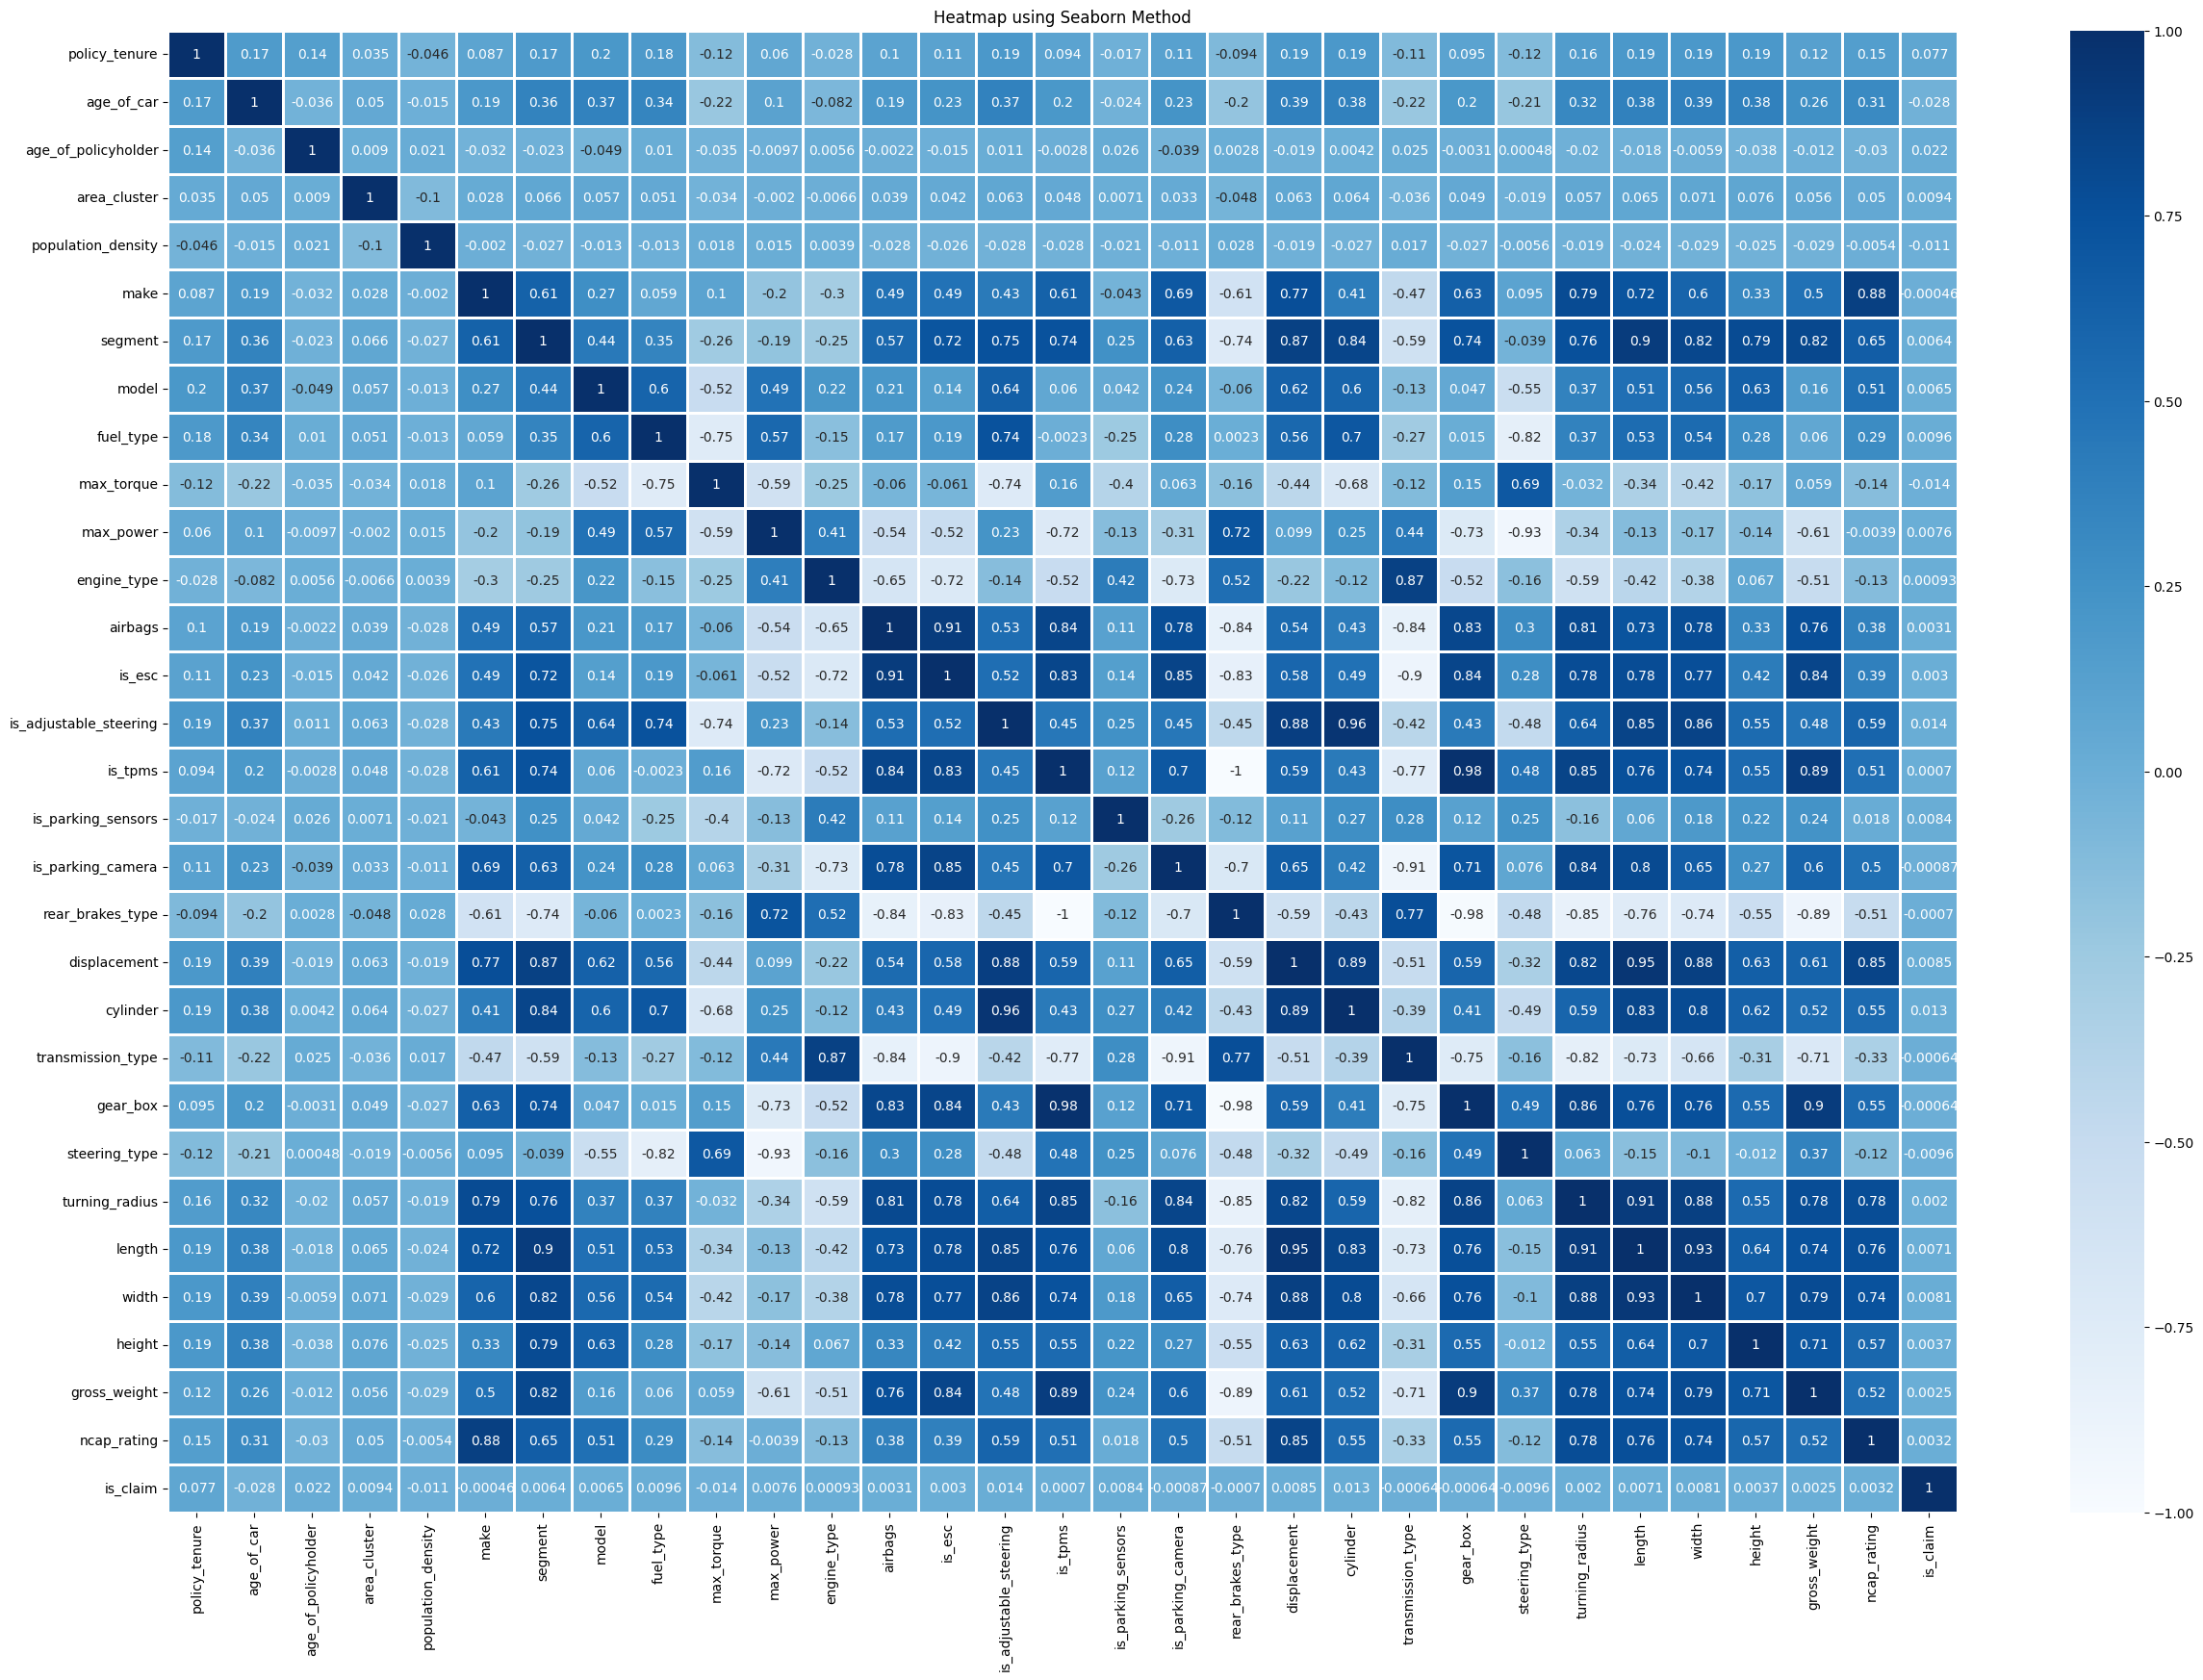

In [144]:
plt.figure(figsize=(30,20))
heatmap=sns.heatmap(data1,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using Seaborn Method")
plt.show()

# Model on data to check performance

In [13]:
#sampling the data

x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_claim, dtype: int64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((41014, 30), (17578, 30), (41014,), (17578,))

# Logistic Regression

In [16]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [17]:
lg_pred1=lg.predict(x_test)
lg_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
# Confusion_Matrix
s0=confusion_matrix(lg_pred1,y_test)
s0

array([[16452,  1126],
       [    0,     0]], dtype=int64)

In [19]:
# Accuracy
lg_acc=s0.diagonal().sum()/s0.sum()*100
lg_acc

93.59426555922175

In [20]:
# Classification_report
print(classification_report(lg_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17578
           1       0.00      0.00      0.00         0

    accuracy                           0.94     17578
   macro avg       0.50      0.47      0.48     17578
weighted avg       1.00      0.94      0.97     17578



# Decision Tree

In [21]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
dt_pred1=dt.predict(x_test)
dt_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
# Confusion_Matrix
s1=confusion_matrix(dt_pred1,y_test)
s1

array([[15199,  1041],
       [ 1253,    85]], dtype=int64)

In [24]:
# Accuracy
dt_acc=s1.diagonal().sum()/s1.sum()*100
dt_acc

86.94959608601661

In [25]:
# Classification_report
print(classification_report(dt_pred1,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     16240
           1       0.08      0.06      0.07      1338

    accuracy                           0.87     17578
   macro avg       0.50      0.50      0.50     17578
weighted avg       0.86      0.87      0.86     17578



# Random Forest

In [26]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
rf_pred1=rf.predict(x_test)
rf_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
# Confusion_matrix
s2=confusion_matrix(rf_pred1,y_test)
s2

array([[16371,  1117],
       [   81,     9]], dtype=int64)

In [29]:
# Accuracy
rf_acc=s2.diagonal().sum()/s2.sum()*100
rf_acc

93.18466264648994

In [30]:
# Classification_report
print(classification_report(rf_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.96     17488
           1       0.01      0.10      0.01        90

    accuracy                           0.93     17578
   macro avg       0.50      0.52      0.49     17578
weighted avg       0.99      0.93      0.96     17578



# Boosting

In [31]:
ad=AdaBoostClassifier(RandomForestClassifier(),n_estimators=5)
ad.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=5)

In [32]:
ad_pred1=ad.predict(x_test)
ad_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
# Confusion_Matrix
s3=confusion_matrix(ad_pred1,y_test)
s3

array([[16389,  1118],
       [   63,     8]], dtype=int64)

In [34]:
# Accuracy
ad_acc=s3.diagonal().sum()/s3.sum()*100
ad_acc

93.28137444532939

In [35]:
# Classifcation_report
print(classification_report(ad_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17507
           1       0.01      0.11      0.01        71

    accuracy                           0.93     17578
   macro avg       0.50      0.52      0.49     17578
weighted avg       0.99      0.93      0.96     17578



# xgboost

In [36]:
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
xg_pred1=xg.predict(x_test)
xg_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# Confusion_Matrix
s4=confusion_matrix(xg_pred1,y_test)
s4

array([[16447,  1126],
       [    5,     0]], dtype=int64)

In [39]:
# Accuracy
xg_acc=s4.diagonal().sum()/s4.sum()*100
xg_acc

93.56582091250428

In [40]:
# Classification_report
print(classification_report(xg_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17573
           1       0.00      0.00      0.00         5

    accuracy                           0.94     17578
   macro avg       0.50      0.47      0.48     17578
weighted avg       1.00      0.94      0.97     17578



# SVC

In [41]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [42]:
svc_pred1=svc.predict(x_test)
svc_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
# Confusion_Matrix
s5=confusion_matrix(svc_pred1,y_test)
s5

array([[16452,  1126],
       [    0,     0]], dtype=int64)

In [44]:
# Accuracy
svc_acc=s5.diagonal().sum()/s5.sum()*100
svc_acc

93.59426555922175

In [45]:
# Classification_report
print(classification_report(svc_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17578
           1       0.00      0.00      0.00         0

    accuracy                           0.94     17578
   macro avg       0.50      0.47      0.48     17578
weighted avg       1.00      0.94      0.97     17578



# KNN

In [46]:
# kn=KNeighborsClassifier(n_neighbors=20)
# kn.fit(x_train,y_train)

In [47]:
# kn_pred=kn.predict(x_test)
# kn_pred

In [48]:
# s6=confusion_matrix(kn_pred,y_test)
# s6

In [49]:
# acc_kn=s6.diagonal().sum()/s6.sum()*100
# acc_kn

In [50]:
# print(classification_report(kn_pred,y_test))

In [102]:
data.is_claim.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

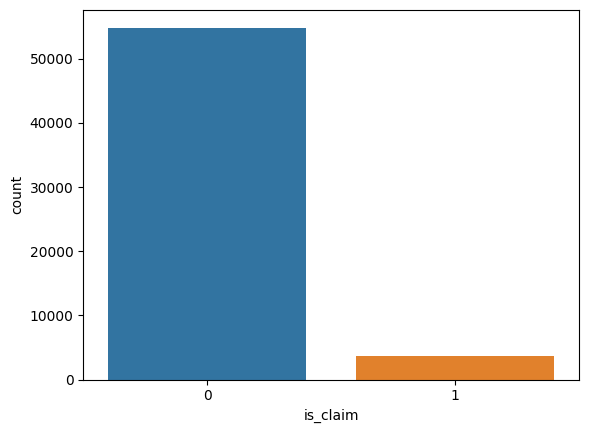

In [103]:
sns.countplot(data=data,x='is_claim')
plt.show()

Preliminary models were run to narrow down the selection. Selected models are LogisticRegression, DecisionTree, XGBoost, RF,  There is also a class imbalance problem. So performing class imbalance techniques.

# synthetic minority oversampling technique(SMOTE)

In [125]:
sm=SMOTE()

In [126]:
data_x=data.iloc[:,0:-1]
data_y=data.iloc[:,-1]

In [127]:
#data_x.head(3)

In [128]:
data_x.shape,data_y.shape

((58592, 30), (58592,))

In [129]:
x_smote,y_smote=sm.fit_resample(data_x,data_y)
x_smote.shape,y_smote.shape

((109688, 30), (109688,))

In [145]:
y_smote.value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

# Outlier Treatment

<AxesSubplot: >

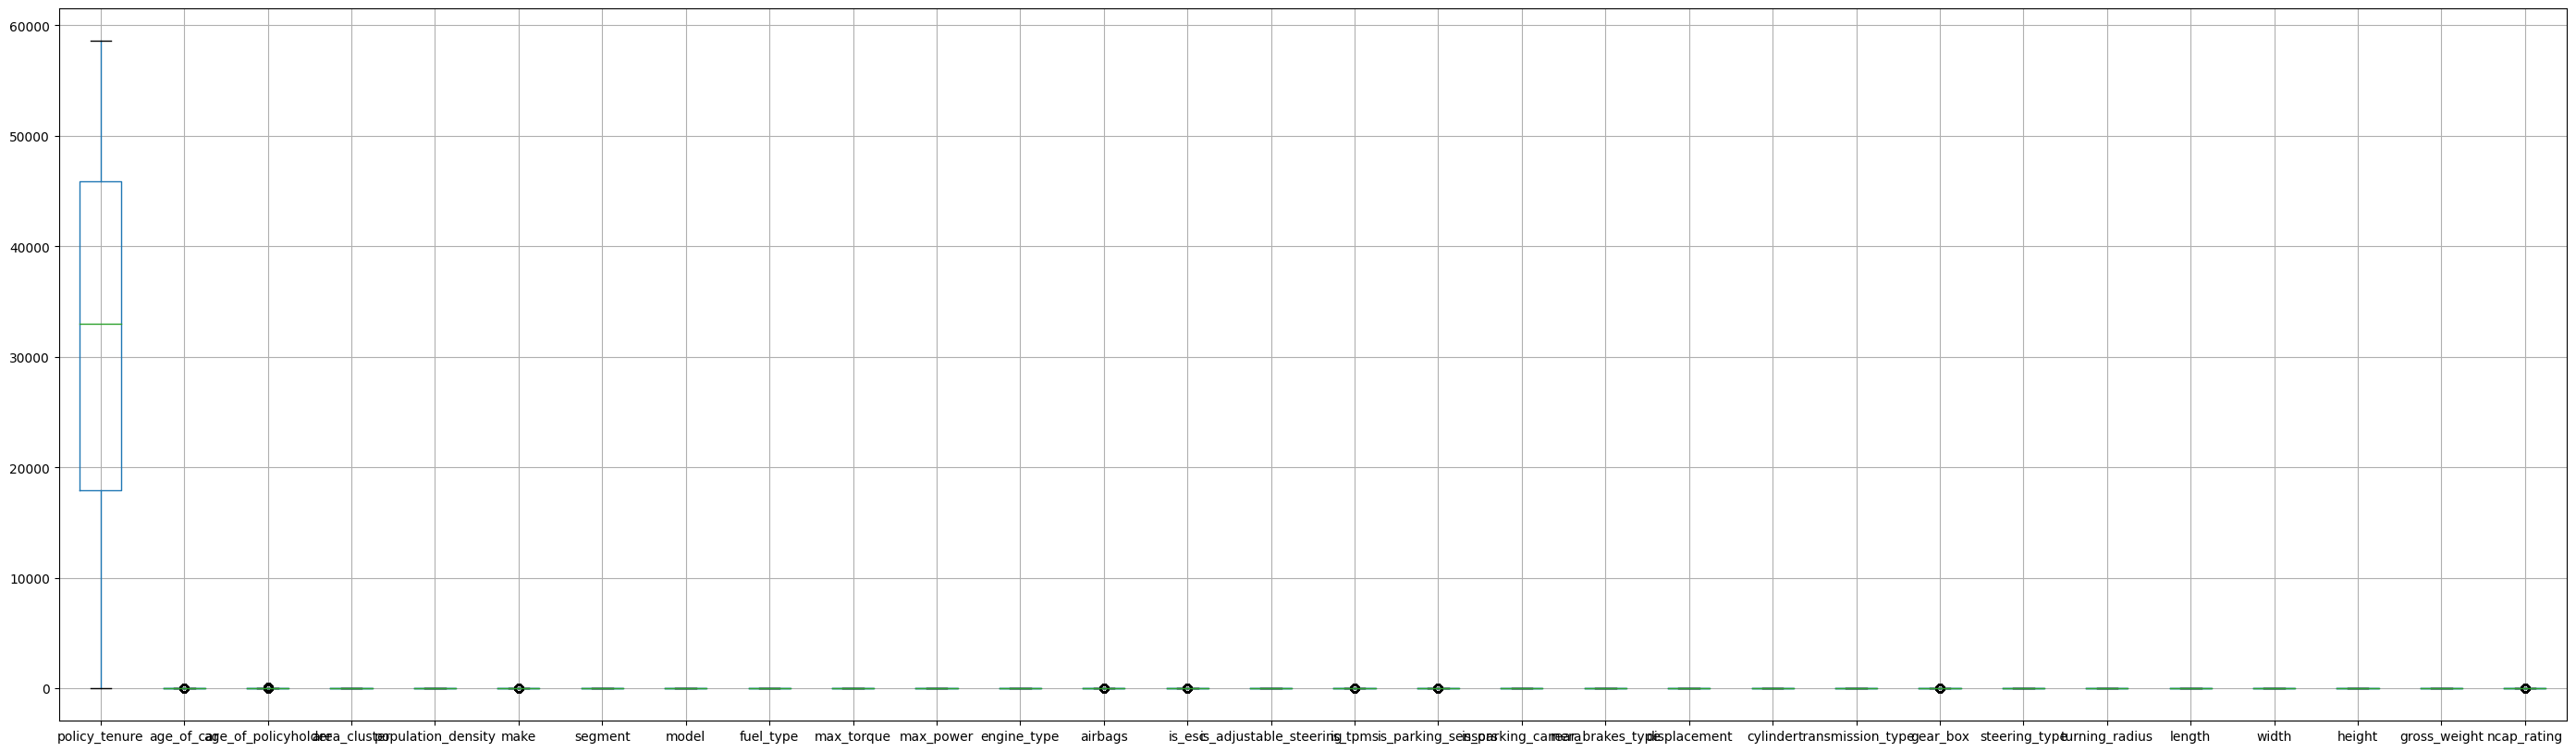

In [56]:
x_smote.boxplot(figsize=(35,10))

array([[<AxesSubplot: title={'center': 'policy_tenure'}>,
        <AxesSubplot: title={'center': 'age_of_car'}>,
        <AxesSubplot: title={'center': 'age_of_policyholder'}>,
        <AxesSubplot: title={'center': 'area_cluster'}>,
        <AxesSubplot: title={'center': 'population_density'}>],
       [<AxesSubplot: title={'center': 'make'}>,
        <AxesSubplot: title={'center': 'segment'}>,
        <AxesSubplot: title={'center': 'model'}>,
        <AxesSubplot: title={'center': 'fuel_type'}>,
        <AxesSubplot: title={'center': 'max_torque'}>],
       [<AxesSubplot: title={'center': 'max_power'}>,
        <AxesSubplot: title={'center': 'engine_type'}>,
        <AxesSubplot: title={'center': 'airbags'}>,
        <AxesSubplot: title={'center': 'is_esc'}>,
        <AxesSubplot: title={'center': 'is_adjustable_steering'}>],
       [<AxesSubplot: title={'center': 'is_tpms'}>,
        <AxesSubplot: title={'center': 'is_parking_sensors'}>,
        <AxesSubplot: title={'center': 'is_pa

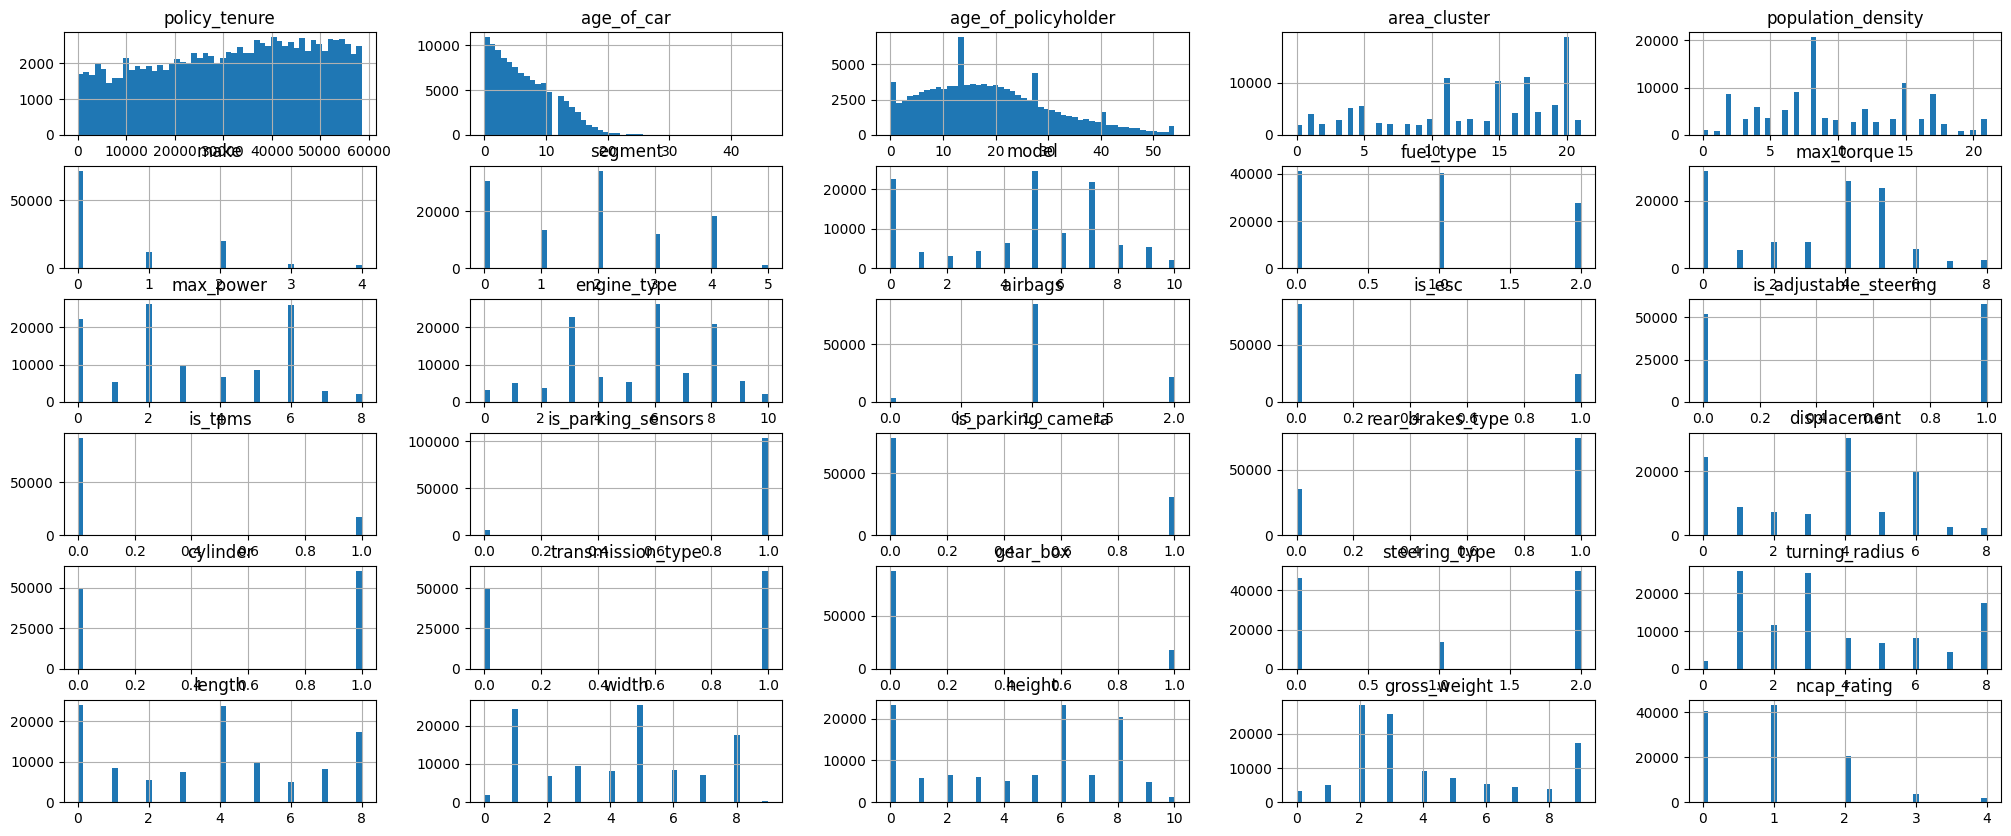

In [105]:
x_smote.hist(bins=50, figsize=(25, 10))

<AxesSubplot: >

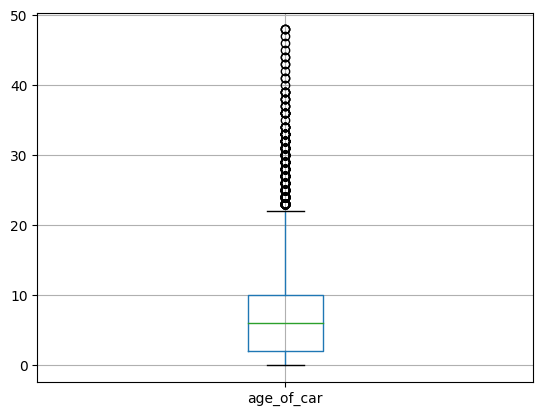

In [58]:
x_smote.boxplot(column=["age_of_car"])

<AxesSubplot: xlabel='age_of_car', ylabel='Density'>

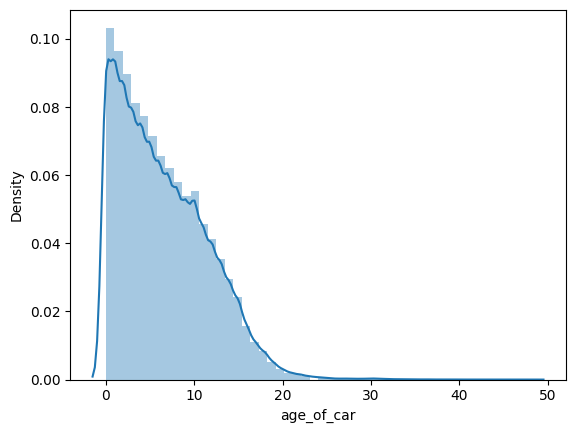

In [59]:
sns.distplot(x_smote["age_of_car"])

In [60]:
x_smote.age_of_car.describe()

count    109688.000000
mean          6.432545
std           5.089926
min           0.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          48.000000
Name: age_of_car, dtype: float64

In [61]:
iqr1=x_smote.age_of_car.quantile(0.75)+x_smote.age_of_car.quantile(0.25)
u1=x_smote["age_of_car"].quantile(0.75)+3*iqr1
print(iqr1, u1)

12.0 46.0


In [62]:
x_smote.loc[x_smote["age_of_car"]>46,"age_of_car"]=46

In [63]:
# box=x_smote.boxplot(column="age_of_car")

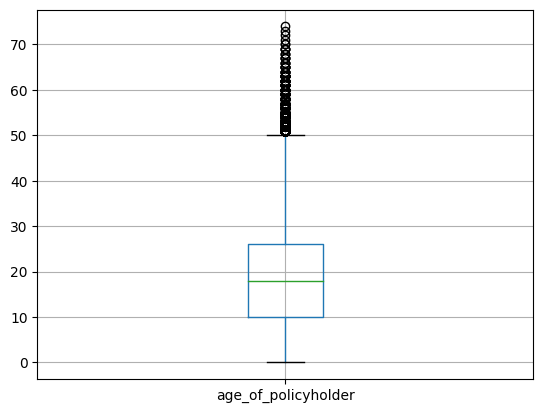

In [64]:
box=x_smote.boxplot(column="age_of_policyholder")

<AxesSubplot: xlabel='age_of_policyholder', ylabel='Density'>

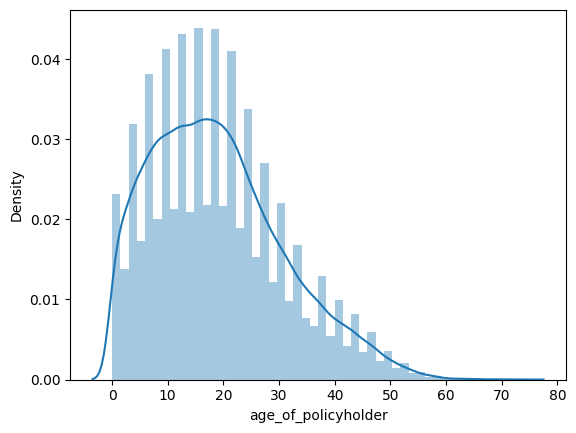

In [65]:
sns.distplot(x_smote["age_of_policyholder"])

In [66]:
x_smote.age_of_policyholder.describe()

count    109688.000000
mean         18.947560
std          11.894121
min           0.000000
25%          10.000000
50%          18.000000
75%          26.000000
max          74.000000
Name: age_of_policyholder, dtype: float64

In [67]:
u_1=x_smote["age_of_policyholder"].mean()+3*x_smote["age_of_policyholder"].std()
u_1

54.62992327603169

In [68]:
x_smote.loc[x_smote["age_of_policyholder"]>54,"age_of_policyholder"]=54

In [69]:
# x_smote.boxplot(column=["age_of_policyholder"])

In [131]:
#x_smote.skew()

## Data splitting

In [72]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((87750, 30), (21938, 30), (87750,), (21938,))

# Logistic regression

In [73]:
lg=LogisticRegression()
lg.fit(x1_train,y1_train)

LogisticRegression()

In [74]:
lg_pred2=lg.predict(x1_test)
lg_pred2

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [75]:
c_0=confusion_matrix(lg_pred2,y1_test)
c_0

array([[7924, 4745],
       [3019, 6250]], dtype=int64)

In [76]:
lg_acc1=c_0.diagonal().sum()/c_0.sum()*100
lg_acc1

64.60935363296562

In [77]:
print(classification_report(lg_pred2,y1_test))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67     12669
           1       0.57      0.67      0.62      9269

    accuracy                           0.65     21938
   macro avg       0.65      0.65      0.64     21938
weighted avg       0.66      0.65      0.65     21938



# Decision Tree

In [78]:
dt=DecisionTreeClassifier()
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [79]:
dt_pred2=dt.predict(x1_test)
dt_pred2

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [80]:
c_1=confusion_matrix(dt_pred2,y1_test)
c_1

array([[ 9978,   711],
       [  965, 10284]], dtype=int64)

In [81]:
dt_acc1=c_1.diagonal().sum()/c_1.sum()*100
dt_acc1

92.36028808460206

In [82]:
print(classification_report(dt_pred2,y1_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     10689
           1       0.94      0.91      0.92     11249

    accuracy                           0.92     21938
   macro avg       0.92      0.92      0.92     21938
weighted avg       0.92      0.92      0.92     21938



# Random Forest

In [83]:
rf=RandomForestClassifier()
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [84]:
rf_pred2=rf.predict(x1_test)
rf_pred2

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [85]:
c_2=confusion_matrix(rf_pred2,y1_test)
c_2

array([[10650,   915],
       [  293, 10080]], dtype=int64)

In [86]:
rf_acc1=c_2.diagonal().sum()/c_2.sum()*100
rf_acc1

94.49357279606163

In [87]:
print(classification_report(rf_pred2,y1_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     11565
           1       0.92      0.97      0.94     10373

    accuracy                           0.94     21938
   macro avg       0.95      0.95      0.94     21938
weighted avg       0.95      0.94      0.94     21938



# AUCROC Curve for RF 

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [89]:
pred=rf.predict_proba(x1_test)

In [90]:
roc=roc_auc_score(rf_pred2,y1_test)
df1=pd.DataFrame(pred)

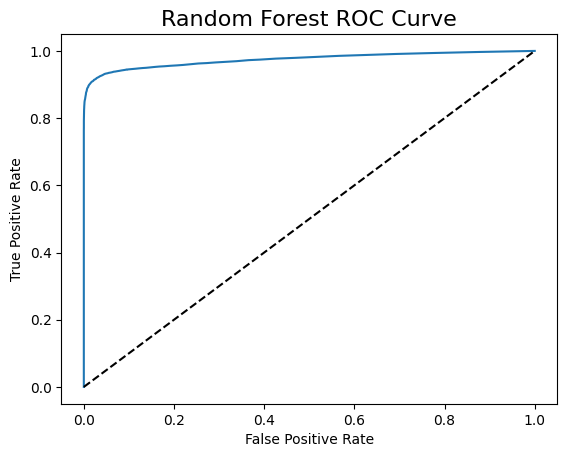

In [91]:
fpr,tpr,threshold=roc_curve(y1_test,df1.iloc[:,1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

# Boosting

In [92]:
ad=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)
ad.fit(x1_train,y1_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [93]:
ad_pred2=ad.predict(x1_test)
ad_pred2

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [94]:
c_3=confusion_matrix(ad_pred2,y1_test)
c_3

array([[10056,   703],
       [  887, 10292]], dtype=int64)

In [95]:
ad_acc1=c_3.diagonal().sum()/c_3.sum()*100
ad_acc1

92.75230194183608

In [96]:
print(classification_report(ad_pred2,y1_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10759
           1       0.94      0.92      0.93     11179

    accuracy                           0.93     21938
   macro avg       0.93      0.93      0.93     21938
weighted avg       0.93      0.93      0.93     21938



# xgboost

In [97]:
xg=XGBClassifier()
xg.fit(x1_train,y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [98]:
xg_pred2=xg.predict(x1_test)
xg_pred2

array([0, 0, 0, ..., 0, 1, 0])

In [99]:
c_4=confusion_matrix(xg_pred2,y1_test)
c_4

array([[10896,  1208],
       [   47,  9787]], dtype=int64)

In [100]:
xg_acc1=c_4.diagonal().sum()/c_4.sum()*100
xg_acc1

94.27933266478257

In [101]:
print(classification_report(xg_pred2,y1_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     12104
           1       0.89      1.00      0.94      9834

    accuracy                           0.94     21938
   macro avg       0.94      0.95      0.94     21938
weighted avg       0.95      0.94      0.94     21938



# Conclusion

#### Here I got 94% accuracy with Random Forest after class inbalance technique with good precision, recall and f1-score.Hence Random forest is the best fitted Model for this dataset.